# Homework #0 (Due 09/11/2019, 11:59pm)
## Review of Stastistical Modeling and Scientific Computing

**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2019**

**Name: Dimitris Vamvourellis** 

**Students collaborators:**

### Instructions:

**Submission Format:** Use this notebook as a template to complete your homework. Please intersperse text blocks (using Markdown cells) amongst `python` code and results -- format your submission for maximum readability. Your assignments will be graded for correctness as well as clarity of exposition and presentation -- a “right” answer by itself without an explanation or is presented with a difficult to follow format will receive no credit.

**Code Check:** Before submitting, you must do a "Restart and Run All" under "Kernel" in the Jupyter or colab menu. Portions of your submission that contains syntactic or run-time errors will not be graded.

**Libraries and packages:** Unless a problems specifically asks you to implement from scratch, you are welcomed to use any `python` library package in the standard Anaconda distribution.

In [221]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Part I: Maximum Likelihood Estimators for Linear Regression
### (Material covered in CS109A or equivalent)
In this problem, you are given a dataset with a single predictor $X$ and a single outcome $y$, and your task is to fit a linear model to the data. The dataset is saved as `HW0_data.csv` in CSV (Comma Separated Values) format and can be read using the `.read_csv()` function from the `pandas` library.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)
\end{aligned}
where $w_1$ and $w_0$, the *parameters* of the function $f$, are unknown constants. 

1. **(Model Building)** Write the analytical expression for the likelihood function $p(y|x, w_1, w_0)$, for a single observation $(x, y)$. Write the analytical expression for the likelihood function $\prod_{n=1}^N p(y_n|x_n, w_1, w_0)$ for an entire dataset of $N$ number of observations. 

  *Hint: for a given $x$ and fixed parameters, what is the distribution of $y$?*

**ANSWER**

Since $y$ depends on $\epsilon$ which is a random variable, for a given $x$ and fixed parameters, $y$ is also normally distributed:
\begin{aligned}
y \sim \mathcal{N}(w_1x + w_0, 0.5)
\end{aligned}

Hence, for a single observation $(x,y)$, the likelihood function is given by the Normal pdf for the given parameters:

\begin{aligned}
p(y|x, w_1, w_0) = \frac{1}{\sqrt{2*0.5\pi}}e^{-\frac{(y-w_0-w_1x)^2}{2*0.5}} = \frac{1}{\sqrt{\pi}}e^{-(y-w_0-w_1x)^2}
\end{aligned}

Respectively for an entire dataset of N number of observations, the likelihood is given by:
\begin{aligned}
\prod_{n=1}^N p(y_n|x_n, w_1, w_0) = \prod_{n=1}^N \frac{1}{\sqrt{\pi}}e^{-(y_n-w_0-w_1x_n)^2} = {\pi}^{-N/2}*e^{-\displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2}
\end{aligned}

2. **(Defining a Learning Objective)** The Maximum Likelihood Estimators (MLE) of $w_1$ and $w_0$ are defined as

\begin{aligned}
w^{\text{MLE}}_1, w^{\text{MLE}}_0 = \underset{w_1, w_0}{\mathrm{argmax}}\; \prod_{n=1}^N p(y_n|x_n, w_1, w_0)
\end{aligned}
Show that finding $w_1$ and $w_0$ that maximizes the likelihood is equivalent to finding parameters that minimize the Mean Squared Error (MSE) of your model.

*Hint: show that maximizing the log likelihood is equivalent to minimizing the MSE.*

**ANSWER**

The log likelihood is given by:

\begin{aligned}
log(\prod_{n=1}^N p(y_n|x_n, w_1, w_0)) = log(\prod_{n=1}^N \frac{1}{\sqrt{\pi}}e^{-(y_n-w_0-w_1x_n)^2}) = log({\pi}^{-N/2}*e^{-\displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2}) = -\frac{N}{2}log(\pi) - \displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2
\end{aligned}

It is made obvious that the above expression is maximized when the sum over N terms is as small as possible, in other words the log likelihood is maximized when $\displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2$ is minimized. Similarly, to minimize the MSE (i.e. $\frac{1}{N}\displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2$) we need to minimize the exact same sum. Hence, maximizing the log likelihood is equivalent to minimizing the MSE.

3. **(Model Fitting)** Analytically derive the formulae for MLE of $w_1$ and $w_0$. Describe what information you would need in order ***prove*** that the parameters you derived maximizes the likelihood (or minimizes the MSE)?

  **Extra Credit:** express your derivation of the MLE in matrix notation (i.e. [perform matrix calculus](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

  *Hint: this part requires multivariate calculus.*

**ANSWER**

By defining a $Nx1$ vector $y$ containing all $y_n$, a 2x1 vector $w$ (i.e. $w^\top = \left< w_0, w_1 \right>$) and a $Nx2$ matrix $X$ whose first column has only ones and the second column contains all the $x_n$, we can rewrite the sum term (let this $S$) of the log likelihood that we want to minimize in matrix notation as follows:

\begin{aligned}
S = \displaystyle\sum_{n=1}^{N}(y_n-w_0-w_1x_n)^2 = (y - Xw)^\top(y-Xw) = y^\top y - y^\top Xw - w^\top X^\top y - w^\top X^\top Xw = y^\top y - 2y^\top Xw + w^\top X^\top Xw
\end{aligned}

To find the MLE of $w_1$ and $w_0$ is equivalent to maximizing the log likelihood with respect to these parameters and as explained above this is equivalent to minimizing $S$ with respect to the vector $w$. To do this, we need to calculate the gradient vector of $S$ with respect to $w$ and set it to zero in order to solve for vector $w$:

\begin{aligned}
\nabla_{w}(S) = 0 \implies -2X^\top y + 2X^\top Xw = 0 \implies -2X^\top(y-Xw) = 0 
\newline \implies X^\top Xw = X^\top y 
\implies w_{MLE} = (X^\top X)^{-1}X^\top y
\end{aligned}

The above expression gives the 2x1 vector $w_{MLE}$ which contain the MLEs for both dimensions $w_0$ and $w_1$.

For the above solution to hold, matrix $X^\top X$ has to be invertible. A square matrix is invertible if all of its columns are linearly independent. For this to happen $X$ must have more observations than dimensions (i.e. N should be largen than 2), otherwise $X^\top X$ would not be full rank and in turn would be singular. Hence, the above solution would not hold.

The next step is to calculate the second derivative in order to ensure that our solution iis indeed a minimum. To do this, for multivariate functions, we need to calculate the Hessian matrix, using some basic matrix calculus as follows:

\begin{aligned}
H = 2X^\top X
\end{aligned}


The above Hessian matrix is positive semi-definite since for any nonzero vector $a$, $a^\top X^\top Xa = (Xa)^\top Xa \geq{0}$. Thus, the critical point is indeed a minimum. Furthermore, if the matrix is positive definite, then this is a global minimum. If a matrix is invertible it will also be positive definite. As already mentioned above, for this to happen, $X$ should have more observations than dimensions (i.e. N should be largen than 2). Otherwise, $X^\top X$ would not be full rank and in turn not invertible. This means that a nonzero vector $a$ would exist such that  $X^\top Xa = 0$. Hence, $a^\top (X^\top X)a = a^\top0 = 0$, which implies that $X^\top X$ would not be positive definite. 

In summary, to prove that the parameters we derived give us the global maximum of the log likelihood, we need to know the dimensions of matrix $X$, or in this case just N (i.e. the number of observations) which should be greater than 2.


4. **(Model Evaluation)** Using the `LinearRegression` class from `sklearn.linear_model`, fit a linear regression model to the dataset in `HW0_data.csv`. When you call the `.fit()` function of `LinearRegression`, the default is to find parameters that minimize MSE.

  Visualize the linear function you fitted as well as the data in one plot. 
  Visualize a histogram of the residuals.
  Using both plots, argue for whether or not your model is appropriate for the data.
  
  *Hint: look at the assumptions you've made in your modeling process, which assumptions are supported by the data, which are contradicted by the data?*

In [222]:
data = pd.read_csv('HW0_data.csv')

X = data['x'].values.reshape(data.shape[0],1)
y = data['y'].values
lin_model = LinearRegression()
lin_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'y')

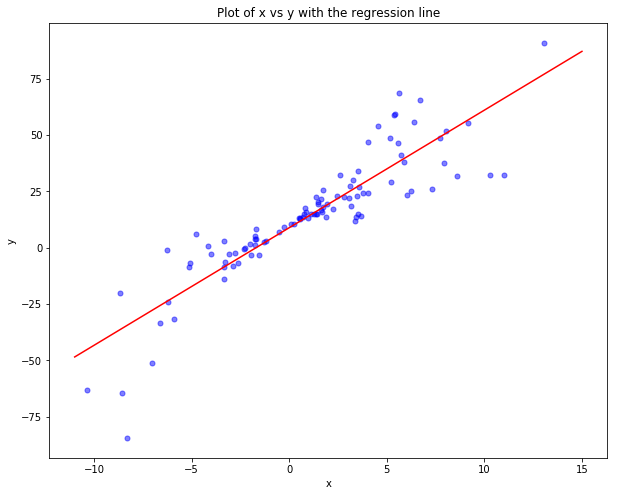

In [223]:
slope = lin_model.coef_
intercept = lin_model.intercept_

plt.figure(figsize=(10,8))

linspace = np.linspace(-11, 15, 100)
plt.plot(X, y, 'bo', alpha=0.5, markersize=5)
plt.plot(linspace, intercept + slope*linspace, 'r-')
plt.title('Plot of x vs y with the regression line')
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 0, 'residuals')

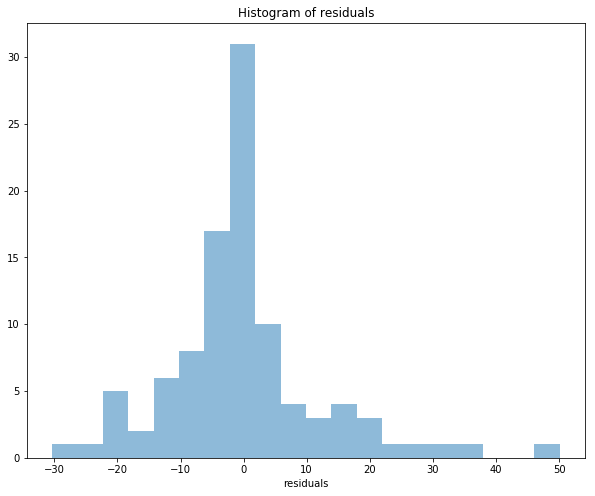

In [224]:
preds = lin_model.predict(X)
residuals = preds - y

plt.figure(figsize=(10,8))
plt.hist(residuals, alpha=0.5, bins=20)
plt.title('Histogram of residuals')
plt.xlabel('residuals')

Text(0, 0.5, 'residual')

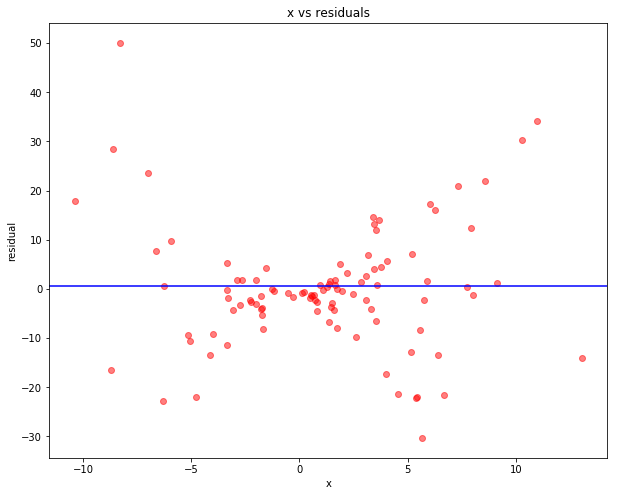

In [27]:
plt.figure(figsize=(10,8))
plt.plot(X, residuals, 'ro', alpha=0.5)
plt.axhline(y=0.5, color='b')
plt.title('x vs residuals')
plt.xlabel('x')
plt.ylabel('residual')

One of the assumptions of the linear model that we applied in this case is that residuals are i.i.d. following a normal distribution $\mathcal{N}(0, 0.5)$. However, by looking at the residual plots above, it is made apparent that the residuals are not identically and normally distributed around 0. In fact, residuals grow larger as $x$ moves further out of the range (-2.5,2.5).  Hence, one of our main assumptions is not true making this linear model not the most appropriate for the data. 

5. **(Uncertainty Quantification)** Compute the 95% [Confidence Interval (CI)](https://stattrek.com/estimation/confidence-interval.aspx) of the parameters you estimated for the dataset in `HW0_data.csv` by bootstrapping (this requires you to access the model parameters of the `LinearRegression` class). How confident are you in the 'correctness' or 'reliability' of your parameter estimates given the CI's?

  Compute the [Predictive Interval (PI)](https://otexts.com/fpp2/prediction-intervals.html) of a single prediction at $x=2$ by bootstrapping. How confident are you in your prediction for $x=2$ given the PI?
  
  *Hint: bootstrapping is the process of (1) generating multiple datasets (with equal size as the training data) that are similarly distributed as your training data by sampling your data with replacement, (2) estimating a quantity of interest repeatedly using these datasets. You can then empirically compute the percentile of interest from the bootstrap estimates of your quanity of interest.* 
  
  *Generating samples from your training data can be done using the `.sample()` function of the `pandas` `DataFrame` class.*
  
  *Computing percentiles of samples can be done using the `.percentile()` function of the `numpy` library.*

In [225]:
samples = 500
slopes = np.zeros(samples)
intercepts = np.zeros(samples)
#get 500 samples of intercepts and slopes based on different bootstrap samples of the original dataset
for n in range(0,samples):
    #get a random sample of 100 points with replacement from the original dataset
    bootstrap = data.sample(frac=1, replace=True)
    #fit a linear model and append the slope and intercept to the corresponding lists
    lin_model = LinearRegression()
    boot_X = bootstrap['x'].values.reshape(bootstrap.shape[0],1)
    boot_y = bootstrap['y'].values
    lin_model = LinearRegression()
    lin_model.fit(boot_X, boot_y)
    slopes[n] = lin_model.coef_
    intercepts[n] = lin_model.intercept_

print("The 95%% confidence interval for the slope w1 is (%f,%f)" % (np.percentile(slopes, 2.5), np.percentile(slopes, 97.5)))
print("The 95%% confidence interval for the intercept w0 is (%f,%f)" % (np.percentile(intercepts, 2.5), np.percentile(intercept, 97.5)))


The 95% confidence interval for the slope w1 is (4.446524,5.988720)
The 95% confidence interval for the intercept w0 is (6.301987,8.863400)


The confidence intervals are very wide which implies that we are not very confident about the reliability of the parameters estimated by the linear model.

In [226]:
samples = 500
preds_at_2 = np.zeros(samples)
#get 500 samples of intercepts and slopes based on different bootstrap samples of the original dataset
for n in range(0,samples):
    #get a random sample of 100 points with replacement from the original dataset
    bootstrap = data.sample(frac=1, replace=True)
    #fit a linear model and append the slope and intercept to the corresponding lists
    lin_model = LinearRegression()
    boot_X = bootstrap['x'].values.reshape(bootstrap.shape[0],1)
    boot_y = bootstrap['y'].values
    lin_model = LinearRegression()
    lin_model.fit(boot_X, boot_y)
    preds_at_2[n] = lin_model.predict(np.array([[2]]))[0]

print("The 95%% confidence interval for the prediction at x=2 is (%f,%f)" % (np.percentile(preds_at_2, 2.5), np.percentile(preds_at_2, 97.5)))


The 95% confidence interval for the prediction at x=2 is (16.801710,21.811981)


Again the prediction interval is very wide, which shows that given this model, we are uncertain about the prediction at this point.

## Part II: Bayesian Linear Regression
### (Material covered in CS109 B or equivalent)
In this problem, your task is to perform Bayesian linear regression on the dataset in `HW0_data.csv`.

Assume that the outcome $y$ can be modeled by the following process:
\begin{aligned}
y &= f(x) + \epsilon = w_1x + w_0 + \epsilon, \quad \epsilon \sim \mathcal{N}(0, 0.5)\\
w_0 &\sim \mathcal{N}(0, 1)\\
w_1 &\sim \mathcal{N}(0, 0.5)
\end{aligned}
In this model, we assume the same likelihood as in Part I, but we also include priors for $w_0$ and $w_1$: $p(w_0) = \mathcal{N}(0, 1)$, $p(w_1) = \mathcal{N}(0, 0.5)$

1. **(Inference)** Analytically derive the joint posterior distribution over the parameters. That is, analytically compute

\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \frac{\left(\prod_{n=1}^Np(y_n|x_n, w_1, w_0)\right)p(w_1)p(w_0)}{\prod_{n=1}^Np(y_n|x_n)}.
\end{aligned}


  *Hint: The posterior of a model with a Gaussian (or normal) likelihood and Gaussian priors is yet again Gaussian. This derivation is included in many machine learning textbooks like Machine Learning: a Probabilistic Perspective by Murphy or Pattern Recognition and Machine Learning by Bishop. This derivation also appears online in many course notes - you are welcomed to use any and all available resources.*

We know that for Gaussian likelihood and priors, the posterior is Gaussian. Ignoring the normalization constant for now, we have:

\begin{aligned}
p(w | y_1, \ldots y_n, x_1, \ldots, x_n) \propto \mathcal{N}(y|Xw, 0.5I_2) \mathcal{N}(w|\mu, \Sigma), 
\end{aligned}

where, 
\begin{aligned}
w = \begin{pmatrix}
                     w_0  \\
                     w_1 \\
      \end{pmatrix},
\mu = \begin{pmatrix}
                     0  \\
                     0 \\
              \end{pmatrix},
\Sigma = \begin{bmatrix}
    1 & 0 \\
    0 & 0.5 \\
  \end{bmatrix}.
\end{aligned}

Ignoring any constants, the log of the expression on the right of the proportionality symbol is given by

\begin{aligned}
logp(w | y, X) \propto -0.5(y-Xw)^\top 0.5I_2^{-1}(y-Xw) - 0.5(w - \mu)^\top \Sigma^{-1}(w-\mu).
\end{aligned}

Expanding out the quadratic terms involving w and y, and ingoring linear and constant terms, we have

\begin{aligned}
logp(w | y, X) \propto -0.5w^\top \Sigma^{-1}w - 0.5^2y^\top I_2^{-1}y - 0.5^2(Xw)^\top I_2^{-1}(Xw) +  0.5y^\top I_2^{-1}Xw
\end{aligned}


Factoring together the terms depending on $w$, we can identify the parameters of the joint normal posterior as follows:

\begin{aligned}
p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) = \mathcal{N}(w_0, w_1| w_{mean}, V),
\newline w_{mean} = V\Sigma^{-1}\mu + \frac{1}{0.5}VX^\top y = 2VX^\top y,
\newline V = 0.5(0.5\Sigma^{-1}+X^\top X)^{-1},
\end{aligned}

where as defined above, y is a $Nx1$ vector containing all $y_n$, $w$ is a 2x1 vector (i.e. $w^\top = \left< w_0, w_1 \right>$), $X$ is a $Nx2$ matrix whose first column has only ones and the second column contains all the $x_n$ and $N$ is the total number of points in our dataset.

2. **(Model Interpretation)** Visualize the ***joint posterior*** over the parameters, $p(w_1, w_0 | y, x)$ for the dataset in `HW0_data.csv` (you may use a scatter plot of samples drawn from the posterior or a contour map/heat map of the pdf). In separate plots, visualize the ***marginal posterior*** distribution over each parameter,


\begin{aligned}
p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_0\\
p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) &= \int_{w_0} p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n) dw_1
\end{aligned}

  Is the information contained in the joint posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$ equivalent to the information contained in the two marginals $p(w_1 | y_1, \ldots y_n, x_1, \ldots, x_n), p(w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$? That is, what does each distribution tell you?

  *Hint: it is not necessary to analytically derive the marginals $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$. Recall that you can perform marginalization of a variable by sampling from the joint distribution and disregarding that variable.*

In [227]:
Sigma = np.array([[1,0],[0,0.5]])
mu = np.array([0,0])
Sigma_inv = np.linalg.inv(Sigma)
#create a matrix X whose first column is only ones for the bias term and the second column contains the x points
X_bias = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
XTX = np.dot(X_bias.transpose(),X_bias)
V = 0.5 * np.linalg.inv(0.5*Sigma_inv+XTX)
XTy = np.dot(X_bias.transpose(),y)
w_mean = 2 * np.dot(V, XTy)

The mean vector of the joint posterior is given by the following vector w_mean:

In [228]:
w_mean

array([8.81958297, 5.21603948])

The covariance matrix of the joint posterior is given by the following matrix V:

In [229]:
V

array([[ 0.00523783, -0.00024997],
       [-0.00024997,  0.00023784]])

Text(0, 0.5, 'w1')

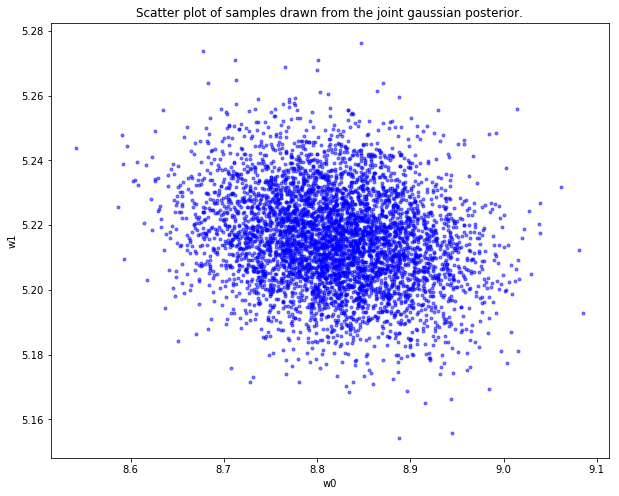

In [230]:
plt.figure(figsize=(10,8))
w0, w1 = np.random.multivariate_normal(w_mean, V, 5000).T
plt.plot(w0, w1, 'bo', alpha=0.5, markersize=3)
plt.title("Scatter plot of samples drawn from the joint gaussian posterior.")
plt.xlabel('w0')
plt.ylabel('w1')

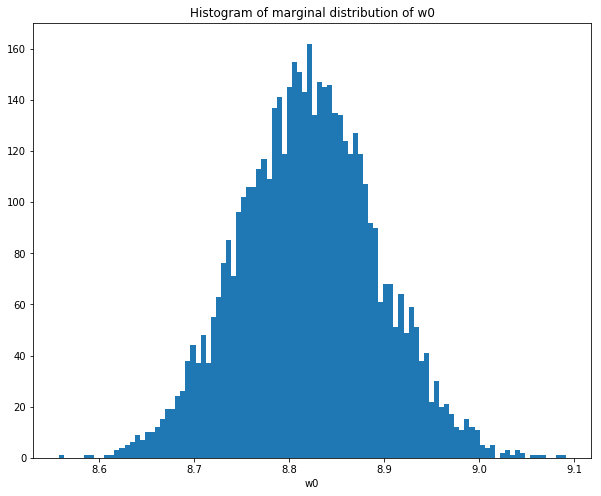

In [103]:
w0, w1 = np.random.multivariate_normal(w_mean, V, 5000).T
plt.figure(figsize=(10,8))
plt.hist(w0, bins=100)
plt.title('Histogram of marginal distribution of w0')
plt.xlabel('w0')
plt.show()

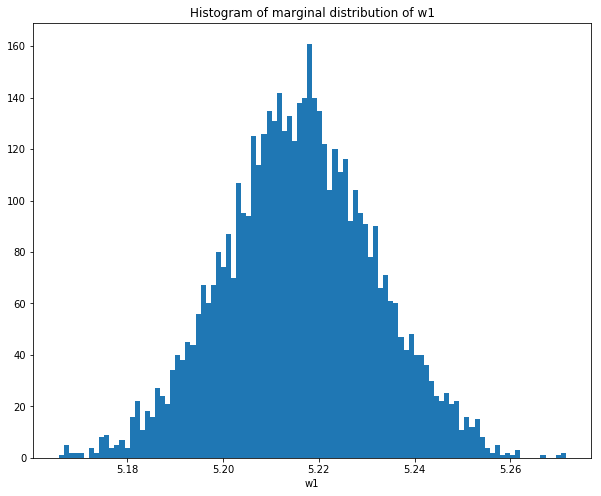

In [104]:
plt.figure(figsize=(10,8))
plt.hist(w1, bins=100)
plt.title('Histogram of marginal distribution of w1')
plt.xlabel('w1')
plt.show()

The information contained by the two marginal posterior distributions separately is not equivalent to the information contained by the joint posterior distribution. Each marginal posterior distribution contains infromation about the mean and the variance of each parameter. However, the joint posterior contains the same information but also contains information about the covariance between these two parameters. From the visualization of the joint posterior shown above, we can see that there is a negative covariance between w0 and w1 which cannot be reflected by the individual marginal posterior distributions.

3. **(Prediction)** In Bayesian linear regression, we obtain a distribution over possible parameters given the data, $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$, rather than a single ***point-estimate*** of the 'best' parameters. This means that when we predict an outcome for, say, $x=2$ we get a distribution over possible values of $y$ rather than a single $y$. The distribution over the predicted $y$ for a given $x$ is called the ***posterior predictive***, and is denoted $p(y|x)$.

  Visualize the posterior predictive $p(y|x)$ at $x=2$ for the dataset in `HW0_data.csv`as a histogram. 

  *Hint: randomly sample possible parameters from the posterior $p(w_1, w_0 | y_1, \ldots y_n, x_1, \ldots, x_n)$. Each sample represents a linear function $f(x)$. Make a prediction at $x=2$ using each $f(x)$.*

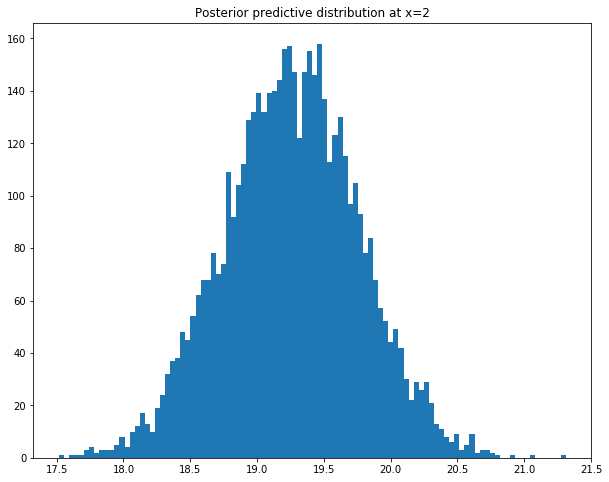

In [231]:
#get a sample of w0 and w1 from the posterior
#use it to find f(x) and take a sample from the posterior predictive N(f(x), 0.5)
#repeat this process for 5000 times to get an empirical distribution of the prediction at this point
samples = 5000
preds_at_2_post = np.zeros(samples)
for n in range(0,samples):
    w0, w1 = np.random.multivariate_normal(w_mean, V, 1).T
    f = w0[0] + w1[0]*2
    preds_at_2_post[n] = np.random.normal(f,0.5,1)[0]
    
plt.figure(figsize=(10,8))
plt.hist(preds_at_2_post, bins=100)
plt.title('Posterior predictive distribution at x=2')
plt.show()

## Part III: Comparison

You've now modeled the same set of data using non-Bayesian and Bayesian regression models. In both paradigms it's possible to identify a 'best' set of model parameters (in the non-Bayesian approach, we compute the MLE; in the Bayesian approach, we can compute the mean or mode of the posterior). In both paradigms it is possible to get a sense of the uncertainty we have about our estimates of the parameter and our predictions. 

1. Compute the 95 percentile interval of the marginal posterior distributions $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$  for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(w_i | y_1, \ldots y_n, x_1, \ldots, x_n)$). Compare these intervals to the CI's you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the parameters?

In [232]:
#sampling from the marginal posteriors of w0 and w1,
#we can calculate empirically the confidence interval of both w0 and w1

w0, w1 = np.random.multivariate_normal(w_mean, V, 5000).T
print("Under the bayesian model, the 95%% confidence interval for the slope w1 is (%f,%f)" % (np.percentile(w1, 2.5), np.percentile(w1, 97.5)))
print("Under the bayesian model, the 95%% confidence interval for the intercept w0 is (%f,%f)" % (np.percentile(w0, 2.5), np.percentile(w0, 97.5)))

Under the bayesian model, the 95% confidence interval for the slope w1 is (5.185869,5.245422)
Under the bayesian model, the 95% confidence interval for the intercept w0 is (8.680600,8.959623)


It is made obvious that the CI's of the coefficients of the bayesian model are much tighter, which implies that the bayesian model is much more certain over the parameters calculated.

2. Compute the 95 percentile interval of posterior predictive at $x=2$ for the dataset in `HW0_data.csv` (you can either do this analytically, or empirically using samples from $p(y| x=2)$). Compare this interval to the PI you computed in Part I. Which interval is wider? What does this say about the uncertainty of each model over the prediction?

In [233]:
#we have repeated the process above so we can just calculate the interval
#from the samples from the posterior predictive obtained above
print("Under the bayesian model, the 95%% confidence interval for the prediction at x=2 is (%f,%f)" % (np.percentile(preds_at_2_post, 2.5), np.percentile(preds_at_2_post, 97.5)))


Under the bayesian model, the 95% confidence interval for the prediction at x=2 is (18.279773,20.255470)


Again the PI for x=2 is tighter under the bayesian model, which implies that the bayesian model is more confident about the prediction at this point compared to the MLE model that we built in Part 1.

**Extra Credit:** For the maximum likelihood model, visualize the mean prediction and the PI at 100 equally spaced $x$'s (using bootstrap) against the training data. Scatter plot the data; plot the mean prediction as a line; plot the PI as similarly colored shaded region (use the `.fill_between()` function from the `matplotlib`).

For the Bayesian regression model, visualize the posterior mean prediction and the 95 percentile interval of the posterior predictive (you should estimate these quantities empirically). Scatter plot the data; plot the posterior mean prediction as a line; plot the PI as similarly colored shaded region. 

Using these visualizations, make an argument for which model is more appropriate for the model. 

For each model how do your choices (the variance in the likelihood, the priors) affect the model you learn? Given the visualizations, are our choices of the likelihood (and or the priors) appropriate?

In [219]:
samples = 1000
x_points = 100
preds_at_x = np.zeros((x_points, samples))
x_linspace = np.linspace(-11, 15, 100)
i=0
#for each x get 100 samples of the prediction at x using bootstrap
for x in x_linspace:
    for n in range(0,samples):
        #get a random sample of 100 points with replacement from the original dataset
        bootstrap = data.sample(frac=1, replace=True)
        #fit a linear model and append the slope and intercept to the corresponding lists
        lin_model = LinearRegression()
        boot_X = bootstrap['x'].values.reshape(bootstrap.shape[0],1)
        boot_y = bootstrap['y'].values
        lin_model = LinearRegression()
        lin_model.fit(boot_X, boot_y)
        preds_at_x[i][n] = lin_model.predict(np.array([[x]]))[0]
    i += 1

Text(0, 0.5, 'y')

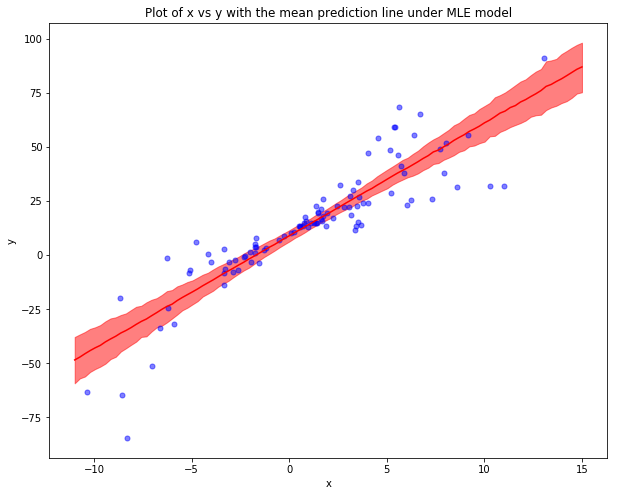

In [220]:
#get the mean prediction foe each x using the bootstrap samples as well as the upper and lower percentiles for 95% PI
mean_pred_MLE = np.mean(preds_at_x, axis=1)
pred_MLE_lower = np.percentile(preds_at_x, 2.5, axis=1)
pred_MLE_upper = np.percentile(preds_at_x, 97.5, axis=1)

plt.figure(figsize=(10,8))
plt.plot(X, y, 'bo', alpha=0.5, markersize=5)
plt.plot(x_linspace, mean_pred_MLE, 'r-')
plt.fill_between(x_linspace, pred_MLE_lower, pred_MLE_upper, alpha=0.5, color='r')
plt.title('Plot of x vs y with the mean prediction line under MLE model')
plt.xlabel('x')
plt.ylabel('y')

In [185]:
samples = 100
preds_at_x_post = np.zeros((x_points, samples))
i=0
for x in x_linspace:
    for n in range(0,samples):
        w0, w1 = np.random.multivariate_normal(w_mean, V, 1).T
        f = w0[0] + w1[0]*x
        preds_at_x_post[i][n] = np.random.normal(f,0.5,1)[0]
    i += 1

Text(0, 0.5, 'y')

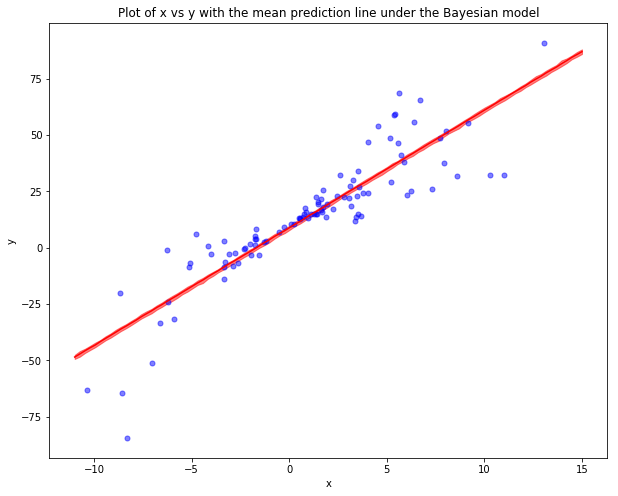

In [188]:
mean_pred_post = np.mean(preds_at_x_post, axis=1)
pred_post_lower = np.percentile(preds_at_x_post, 2.5, axis=1)
pred_post_upper = np.percentile(preds_at_x_post, 97.5, axis=1)

plt.figure(figsize=(10,8))
plt.plot(X, y, 'bo', alpha=0.5, markersize=5)
plt.plot(x_linspace, mean_pred_post, 'r-')
plt.fill_between(x_linspace, pred_post_lower, pred_post_upper, alpha = 0.5, color='r')
plt.title('Plot of x vs y with the mean prediction line under the Bayesian model')
plt.xlabel('x')
plt.ylabel('y')


Given the choices that we made for the priors and the variance of the likelihood, the MLE model seems more appropriate since it reflects the uncertainty that we have in regions where we don't have enough data and the existing data have larger deviation from the mean (i.e. x out of the region [-2.5, 2.5]). On the contrary, the Bayesian model demosntrates excessive certainty even in regions where we should be more uncertain about y given the amount of data that we have and how dispersed they are.

The certainty of this Bayesian model mostly stems from the fact that we made an arbitrary choice to set the variance term in the likelihood to a very small value (i.e. 0.5) and not infer it from the data which would be the case in a fully Bayesian approach. This is a rather arbitrary choice which is not justified by the data. In other words, from the limited data that we have, it seems that they are distributed with a larger variance when $x$ is out of the region [-2.5, 2.5]. Also, given the visualizations, the choice of priors is not appropriate. While the choice of the prior for $w_0$ is not very unrealistic, the prior for $w_1$ should not be centered at 0 with so small variance since it is clear from the data that lines with different positive slopes (greater than 1) can fit the data. Similarly, it would be a more realistic prior belief if the covariance between $w_0$ and $w_1$ was set to a small negative value instead of zero. This would be justified by the fact that if the slope was increased, the intercept should be decreased to fit the data (and vice versa). Given that the priors that we have set are relatively uninformative in combination with the very small variance set for the noise parameter, the posterior distribution is largely affected by the likelihood term. This resulted in a normal posterior distribution peaked at the mean with very low variance and covariance terms. This is then reflected in the posterior predictive distribution which is very peaked at the mean, resulting in very tight PIs.

On the contrary, the MLE solution only depends on the data fed to it and the choice of variance in the likelihood does not affect the model that we learn.
